# Schelling's model of segregation

Described [here](https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation).

Implementation method [here](http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

INITIAL VALUES FOR VARIABLES

In [2]:
N  = 10

density = 0.5  #starting percentage
f1      = 0.4  #fraction of '1' in starting population
f_1     = 1-f1 #fraction of '-1' in starting population

t  =  0.5      #percentage of neighbourhood that must be like the agent



In [3]:
matrix = list()

for i in range(N):
    linha = list()
    for j in range(N):
        linha.append(0)
    matrix.append(linha)
        

In [4]:
for linha in range(len(matrix)):
    for coluna in range(len(matrix[linha])):
        if (rd.random() <= density):
            if (rd.random() <= f1):
                matrix[linha][coluna] = 1
            else:
                matrix[linha][coluna] = -1
    

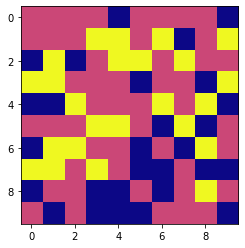

In [6]:
plt.imshow(matrix, cmap='plasma')

#0  Vermelho
#1  Amarelo
#-1 Azul

In [7]:
def get_neighbours(coordinates, N):
    neighbours = list()
    n_range    = [-1, 0, 1]
    [x, y]     = coordinates
    
    for i in n_range:
        for j in n_range:
            if ((x+i >= 0 and x+i < N) and (y+j >= 0 and y+j < N)) and (not (i == 0 and j == 0)):
                neighbours.append([coordinates[0]+i, coordinates[1]+j])
                  
    return neighbours
    
def check_neighbours(matrix, coordinates):
    N = len(matrix)
    neighbours = get_neighbours(coordinates,N)
    content = list()
    
    content = [matrix[pos[0]][pos[1]] for pos in neighbours]
    
    return content

In [8]:
print(get_neighbours([1,1],N))
check_neighbours(matrix,[1,1])

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]


[0, 0, 0, 0, 0, -1, 1, -1]